In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

**Importing the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/assignment 11 -16/Social_Network_Ads.csv")

In [ ]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
X = df.iloc[:,[2,3]].values
X.shape

(400, 2)

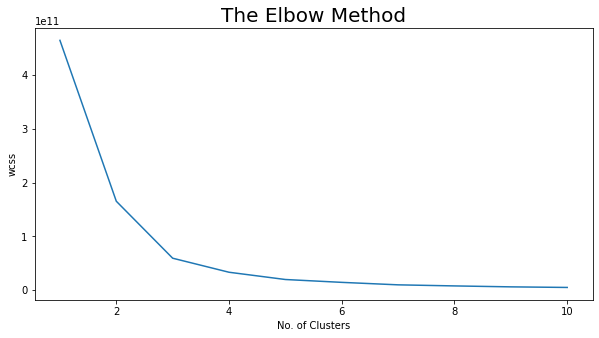

In [ ]:
#importing the kmeans for avoiding the value error

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(X)
  wcss.append(km.inertia_)
  
# plotting the results

plt.rcParams['figure.figsize'] = (10, 5)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

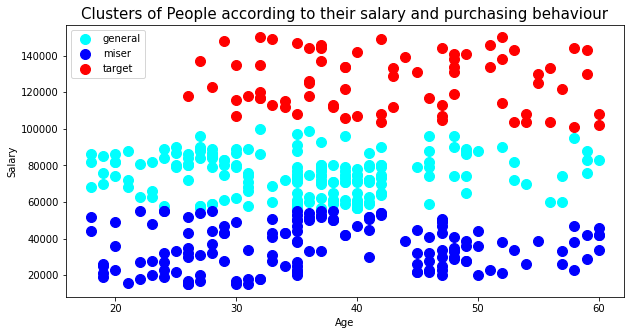

In [ ]:
kmeans = KMeans(n_clusters = 3, max_iter = 300,  init = 'k-means++', random_state = 0, n_init = 10)
y_means = kmeans.fit_predict(X)

plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s = 100, c = 'cyan', label = 'general')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 100, c = 'blue', label = 'miser')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s = 100, c = 'red', label = 'target')

plt.title('Clusters of People according to their salary and purchasing behaviour',  fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [ ]:
# splitting the dataset into dependent and independent sets

X = df.iloc[:, [2,3]].values
y = df["Purchased"].values

In [ ]:
# checking the shape of the datasets
print("Shape of X :", X.shape)
print('Shape of y :', y.shape)

Shape of X : (400, 2)
Shape of y : (400,)


**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state =0)

In [ ]:
print('X train shape: ', X_train.shape)
print('X test shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('y test shape: ', y_test.shape)

X train shape:  (300, 2)
X test shape:  (300, 2)
y train shape:  (300,)
y test shape:  (100,)


**Feature Scaling**

In [ ]:
#Using Standard scaler to unaffect the model by high difference independent variables
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Fitting SVM to the Training set**

In [ ]:
classifier = SVC()
classifier.fit(X_train,y_train)

SVC()

**Predicting the Test set results**

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
results = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
results

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,1
98,1,1


In [ ]:
accuracy_score (y_test,y_pred)

0.93

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
Cm = confusion_matrix(y_test,y_pred) 

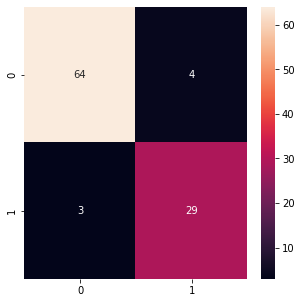

In [ ]:
plt.rcParams['figure.figsize'] = (5 , 5)
Cm = confusion_matrix(y_test, y_pred)
sns.heatmap(Cm, annot = True)

**Visualising the Training set results**

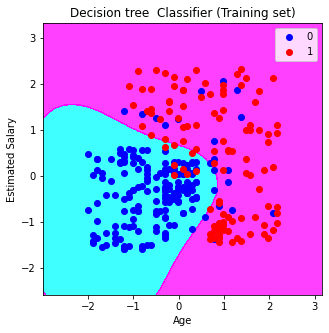

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('cyan', 'magenta')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'red'))(i), label = j)
plt.title('Decision tree  Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visualising the Test set results**

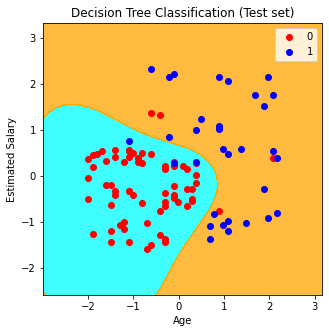

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('cyan', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()